In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [39]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-telecom-customer.csv'
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [0]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] 
y = df['custcat']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (750, 11) (750,)
Test set: (250, 11) (250,)


In [30]:
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.272, 0.292, 0.272, 0.26, 0.304, 0.296, 0.34, 0.34, 0.332, 0.304, 0.3, 0.288, 0.292, 0.288, 0.3, 0.296, 0.296, 0.312, 0.324, 0.328, 0.32, 0.328, 0.332, 0.336, 0.34]


Text(0, 0.5, 'Testing Accuracy')

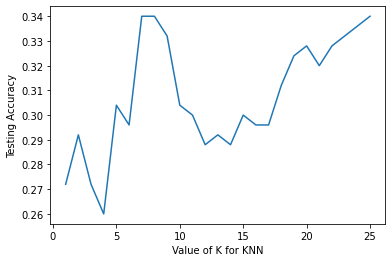

In [31]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [34]:
from sklearn.neighbors import KNeighborsClassifier

k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [35]:
predictions = neigh.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           1       0.34      0.53      0.41        64
           2       0.36      0.29      0.32        51
           3       0.34      0.36      0.35        70
           4       0.31      0.17      0.22        65

    accuracy                           0.34       250
   macro avg       0.34      0.34      0.33       250
weighted avg       0.34      0.34      0.33       250

Confusion Matrix:
 [[34 10 14  6]
 [10 15 17  9]
 [27  9 25  9]
 [29  8 17 11]]
Accuracy Score: 0.34


In [38]:
new_observation = [[2,11,0,22,0,1,40,3,5,0,1]]
neigh.predict(new_observation)

array([1])